### Imports

In [1]:
%matplotlib widget

import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
import ipympl
import ipywidgets as ipw
import ea
import we

### Load training results

In [2]:
base_folder = os.getcwd()
train_file = "opt_dat.pkl.pop50"
train_data = joblib.load(os.path.join(base_folder, train_file))

### Print cost functions

In [3]:
for c in train_data['cost_fun']: print(c)

C1
C2
C3


### Plot Pareto front over generations

In [4]:
max_fig = 10

pareto = train_data['pareto_hist']
last_gen = np.max(list(pareto.keys()))
max_fit00 = np.max([np.max(pareto[g][:,1]) for g in range(0,last_gen+1)])
max_fit01 = np.max([np.max(pareto[g][:,2]) for g in range(0,last_gen+1)])
max_fit02 = np.max([np.max(pareto[g][:,3]) for g in range(0,last_gen+1)])
#max_fit03 = np.max([np.max(pareto[g][:,4]) for g in range(0,last_gen+1)])
#max_fit04 = np.max([np.max(pareto[g][:,5]) for g in range(0,last_gen+1)])
#max_fit05 = np.max([np.max(pareto[g][:,6]) for g in range(0,last_gen+1)])
#max_fit06 = np.max([np.max(pareto[g][:,7]) for g in range(0,last_gen+1)])
#max_fit07 = np.max([np.max(pareto[g][:,8]) for g in range(0,last_gen+1)])

w = ipw.IntSlider(
    value=0,
    min=0,
    max=last_gen,
    step=1,
    description='Generation:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

init_plot = 1
ax_xlim = [0,1]
ax_ylim = [0,1]

def plot_update(gen):
    
    global init_plot, ax_xlim, ax_ylim

    if init_plot:
        ax_xlim = (0.0,max_fit00*1.1)
        ax_ylim = (0.0,max_fit01*1.1)
        init_plot = 0
    else:
        ax_xlim = plt.gcf().axes[0].get_xlim()
        ax_ylim = plt.gcf().axes[0].get_ylim()
    
    while len(plt.get_fignums()) > max_fig:
        plt.close(plt.get_fignums()[0])
    
    fig, ax = plt.subplots()
    ax.scatter(x=pareto[gen][:,1], y=pareto[gen][:,2], alpha=0.8)
                
    ax.set_xlim(ax_xlim)
    ax.set_ylim(ax_ylim)
    plt.show()

ipw.interact(plot_update, gen=w);

interactive(children=(IntSlider(value=0, continuous_update=False, description='Generation:', max=14), Output()…

### Plot Pareto ranks at final generation

                id  rnk          fit00         fit01     fit02
8   47469137283152  1.0       0.059015      0.125005  2.597815
32  47469128742560  1.0  172581.240661  60011.042499  0.834863
38  47469127425760  1.0       0.059876      0.122475  4.754711
45  47469137403760  1.0       0.070384      0.032418  4.102926


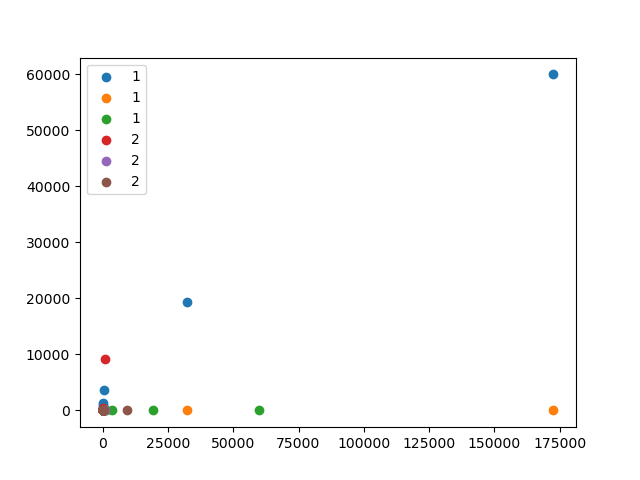

In [5]:
db = train_data['referee'].db
print(db[db.rnk==1])
last_front = int(db.rnk.max())

max_fit00 = np.max(pareto[last_gen][:,1]) # velocity in BOW+CENTER
max_fit01 = np.max(pareto[last_gen][:,2]) # velocity in STERN+WAKE
max_fit02 = np.max(pareto[last_gen][:,3]) # wall shear stress along BOR

fig, ax = plt.subplots()

ax_xlim = [0,0.01]
ax_ylim = [0.08,0.16]

for f in range(1,3):#last_front+1):

    mask = (db.rnk >= f) & (db.rnk < f+1)

    sc = ax.scatter(x=db[mask].loc[:,'fit00'], y=db[mask].loc[:,'fit01'], label=f)
    sc = ax.scatter(x=db[mask].loc[:,'fit00'], y=db[mask].loc[:,'fit02'], label=f)
    sc = ax.scatter(x=db[mask].loc[:,'fit01'], y=db[mask].loc[:,'fit02'], label=f)

ax.legend()
#ax.set_xlim(ax_xlim)
#ax.set_ylim(ax_ylim)

plt.show()

### Select colonies on Pareto front

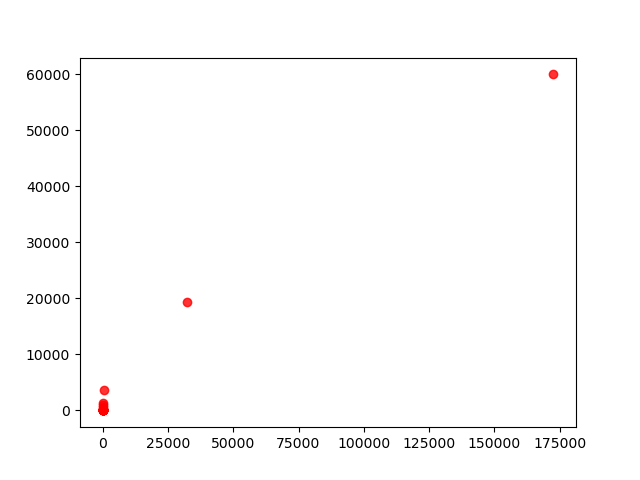

In [7]:
db = train_data['referee'].db

last_front = int(db.rnk.max())

fig, ax = plt.subplots()
    
f = 1

mask = (db.rnk >= f) & (db.rnk < f+1)
    
sc = ax.scatter(x=db[mask].loc[:,'fit00'], y=db[mask].loc[:,'fit01'], alpha=0.8, c='r') 
#sc = ax.scatter(x=db[mask].loc[:,'fit00'], y=db[mask].loc[:,'fit02'], alpha=0.8, c='b') 
#sc = ax.scatter(x=db[mask].loc[:,'fit01'], y=db[mask].loc[:,'fit02'], alpha=0.8, c='k') 

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="-"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(", ".join(list(map(str,ind["ind"]))))
    annot.set_text(text)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        print(type(ind))
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [14]:
plot_ids = [18,23, 27]

In [15]:
colos = list(db[mask].iloc[plot_ids,:].index)
run_ids = [train_data['referee']._pop.fac._world.get_run_id(train_data['referee']._pop[colo]) for colo in colos]
print(run_ids)

['00204', '00382', '00341']
